In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import (r2_score, mean_absolute_error, root_mean_squared_error, accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix)

# Carga el conjunto de datos con la ruta especificada
df = pd.read_csv('C:/Users/ivan_/Documents/bootcamp/machine learning/core04/retail_sales_dataset.csv')

# Convierte la columna `Date` a tipo de dato 'datetime'
df['Date'] = pd.to_datetime(df['Date'])

# Elimina las columnas no numéricas
df = df.drop(['Customer ID', 'Date', 'Transaction ID'], axis=1)


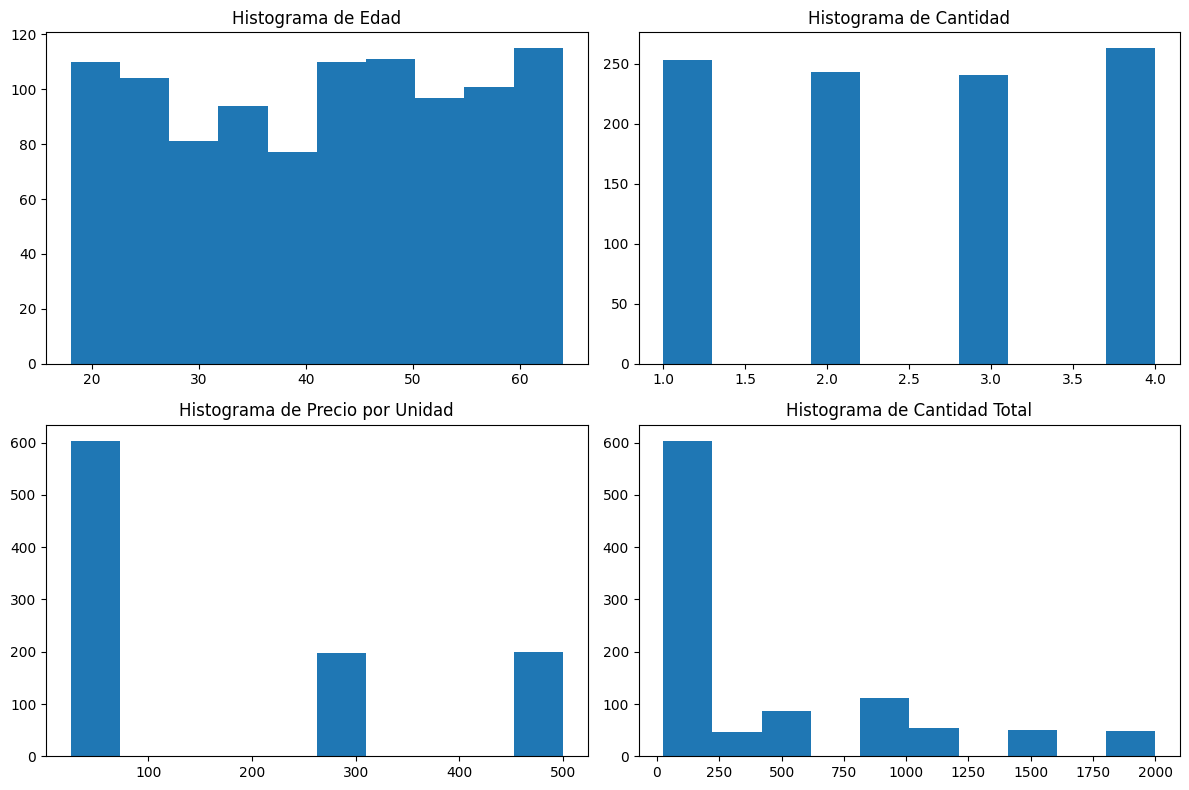

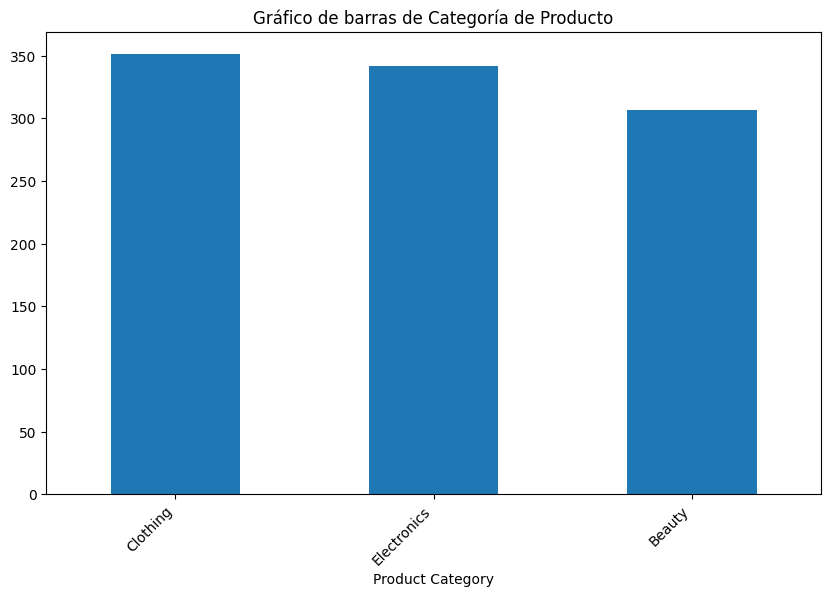

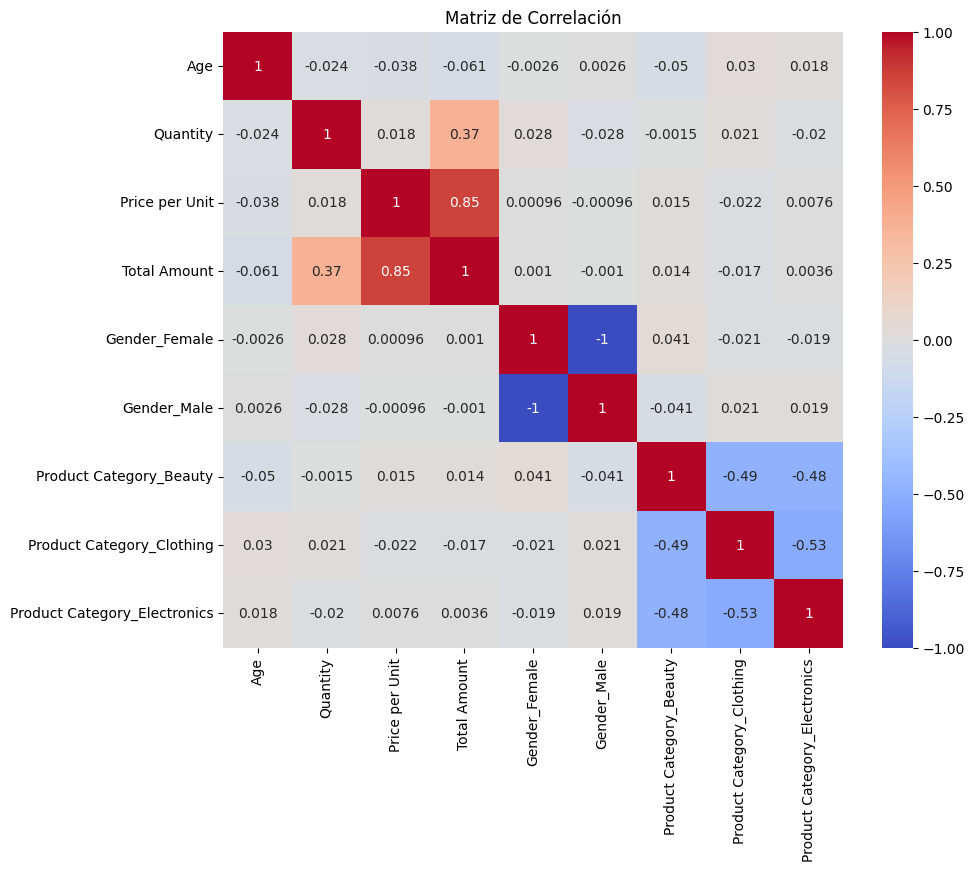

In [6]:

# =============================================================================
# Parte 1: Exploración y Visualización de Datos (EDA)
# =============================================================================

# Crea histogramas para las variables numéricas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(df['Age'])
axs[0, 0].set_title('Histograma de Edad')
axs[0, 1].hist(df['Quantity'])
axs[0, 1].set_title('Histograma de Cantidad')
axs[1, 0].hist(df['Price per Unit'])
axs[1, 0].set_title('Histograma de Precio por Unidad')
axs[1, 1].hist(df['Total Amount'])
axs[1, 1].set_title('Histograma de Cantidad Total')
plt.tight_layout()
plt.show()

# Crea un gráfico de barras para la columna `Product Category`
plt.figure(figsize=(10, 6))
df['Product Category'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Gráfico de barras de Categoría de Producto')
plt.show()

# Convierte las columnas 'Gender' y 'Product Category' a representaciones numéricas
df = pd.get_dummies(df, columns=['Gender', 'Product Category'])

# Crea un mapa de calor para la matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [7]:

# =============================================================================
# Parte 2: Preprocesamiento de Datos
# =============================================================================

# Define las características numéricas y categóricas
numerical_features = ['Age', 'Quantity', 'Price per Unit']
categorical_features = ['Gender_Female', 'Gender_Male',
                        'Product Category_Beauty', 'Product Category_Clothing', 'Product Category_Electronics']

# Crea un ColumnTransformer para aplicar diferentes transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crea un pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Prepara los datos
X = df[numerical_features + categorical_features]
y = df['Total Amount']

# Ajusta el pipeline y transforma los datos
X_transformed = pipeline.fit_transform(X)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Aplica PowerTransformer a la variable objetivo
pt = PowerTransformer(method='box-cox')
y_train_reg = pt.fit_transform(y_train.values.reshape(-1, 1))
y_test_reg = pt.transform(y_test.values.reshape(-1, 1))


In [8]:

# =============================================================================
# Parte 3: Benchmarking de Técnicas de Machine Learning
# =============================================================================

# Define los modelos de regresión
models_reg = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor())
]

# Realiza validación cruzada para cada modelo de regresión
for name, model in models_reg:
    scores = cross_val_score(model, X_train, y_train_reg, cv=5, scoring='r2')
    print(f'{name}: R cuadrado promedio = {scores.mean()}')

# Define una función para evaluar los modelos de regresión
def evaluate_model_reg(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

# Evalúa los modelos de regresión
results_reg = []
for name, model in models_reg:
    r2, rmse, mae = evaluate_model_reg(model, X_train, X_test, y_train_reg, y_test_reg)
    results_reg.append({'Model': name, 'R-squared': r2, 'RMSE': rmse, 'MAE': mae})

# Crea un DataFrame con los resultados de regresión
results_df_reg = pd.DataFrame(results_reg)

# Muestra los resultados de regresión
print("Resultados de regresión:\n", results_df_reg)


Linear Regression: R cuadrado promedio = 0.9246611314436557
Decision Tree: R cuadrado promedio = 1.0


c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

Random Forest: R cuadrado promedio = 1.0
KNN: R cuadrado promedio = 0.945528779959889
XGBoost: R cuadrado promedio = 0.999999995698899
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 13
[LightGBM] [Info] Start training from score 0.003447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataC

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 13
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

c:\Users\ivan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:

# =============================================================================
# Parte 4: Análisis de Métricas (para clasificación)
# =============================================================================

# Crea una variable binaria para la curva ROC
y_binary = (df['Total Amount'] > df['Total Amount'].mean()).astype(int)

# Divide los datos en conjuntos de entrenamiento y prueba para clasificación
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_transformed, y_binary, test_size=0.2, random_state=42  # Incluyendo y_binary
)

# Define los modelos de clasificación
models_clf = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier())
]

# Entrena y evalúa los modelos de clasificación
for name, model in models_clf:
    model.fit(X_train_binary, y_train_binary)
    y_pred_binary = model.predict(X_test_binary)  # Agregar esta línea

    # Métricas de clasificación
    print(f'Métricas para {name}:')
    print(f'Exactitud: {accuracy_score(y_test_binary, y_pred_binary)}')

Métricas para Logistic Regression:
Exactitud: 1.0
Métricas para Decision Tree:
Exactitud: 1.0
Métricas para Random Forest:
Exactitud: 0.995
Métricas para KNN:
Exactitud: 0.965
Métricas para XGBoost:
Exactitud: 1.0
[LightGBM] [Info] Number of positive: 281, number of negative: 519
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351250 -> initscore=-0.613549
[LightGBM] [Info] Start training from score -0.613549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 